## Big Data - AWS 


Scale for sentiment towards phone brand:

0: very negative

1: negative

2: somewhat negative

3: somewhat positive

4: positive

5: very positive

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

### Loading Data Sets

In [753]:
Iphone = pd.read_csv('iphone_smallmatrix.csv')
SamsungGalaxy = pd.read_csv('galaxy_smallmatrix.csv')
LargeMatrix = pd.read_csv('LargeMatrix.csv',sep=';')

In [754]:
LargeMatrix.drop('id',axis=1,inplace=True)
LargeMatrix.shape

(36712, 58)

### Initial Exploration

In [9]:
Iphone.head()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Iphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12973 entries, 0 to 12972
Data columns (total 59 columns):
iphone             12973 non-null int64
samsunggalaxy      12973 non-null int64
sonyxperia         12973 non-null int64
nokialumina        12973 non-null int64
htcphone           12973 non-null int64
ios                12973 non-null int64
googleandroid      12973 non-null int64
iphonecampos       12973 non-null int64
samsungcampos      12973 non-null int64
sonycampos         12973 non-null int64
nokiacampos        12973 non-null int64
htccampos          12973 non-null int64
iphonecamneg       12973 non-null int64
samsungcamneg      12973 non-null int64
sonycamneg         12973 non-null int64
nokiacamneg        12973 non-null int64
htccamneg          12973 non-null int64
iphonecamunc       12973 non-null int64
samsungcamunc      12973 non-null int64
sonycamunc         12973 non-null int64
nokiacamunc        12973 non-null int64
htccamunc          12973 non-null int64
iphonedispo

In [15]:
Iphone.describe()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
count,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,...,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000
mean,2.148077,0.071148,0.024050,0.002312,0.137131,0.152316,0.039621,0.289601,0.053727,0.009944,...,0.002312,0.005550,0.064133,0.059200,0.038542,0.057581,0.058198,0.033069,0.016110,3.724505
std,5.664226,0.280869,0.171266,0.051144,4.223547,0.839081,0.255020,2.188978,0.711322,0.163251,...,0.086887,0.183249,0.829639,0.550736,0.426599,0.565341,0.586035,0.313733,0.285808,1.851348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,46.000000,8.000000,8.000000,2.000000,479.000000,6.000000,6.000000,156.000000,65.000000,8.000000,...,5.000000,13.000000,59.000000,26.000000,24.000000,20.000000,25.000000,10.000000,24.000000,5.000000


In [19]:
#any missing values in Data Sets?

print(Iphone.isna().sum().sum())
print(SamsungGalaxy.isna().sum().sum())

0
0


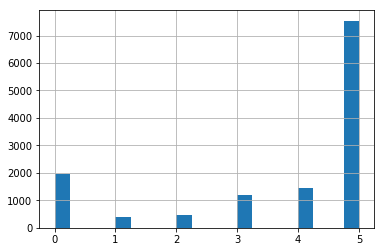

In [687]:
Iphone['iphonesentiment'].hist(bins=20)

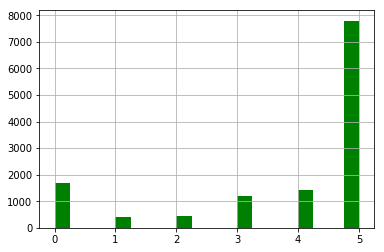

In [688]:
SamsungGalaxy['galaxysentiment'].hist(color='green',bins=20)

In [755]:
Iphone['iphonesentiment'].replace(1,0,inplace=True)
Iphone['iphonesentiment'].replace(2,3,inplace=True)
Iphone['iphonesentiment'].replace(3,3,inplace=True)
Iphone['iphonesentiment'].replace(4,6,inplace=True)
Iphone['iphonesentiment'].replace(5,6,inplace=True)

SamsungGalaxy['galaxysentiment'].replace(1,0,inplace=True)
SamsungGalaxy['galaxysentiment'].replace(2,3,inplace=True)
SamsungGalaxy['galaxysentiment'].replace(3,3,inplace=True)
SamsungGalaxy['galaxysentiment'].replace(4,6,inplace=True)
SamsungGalaxy['galaxysentiment'].replace(5,6,inplace=True)

In [643]:
#counting all levels of sentiment towards Iphone in Training Set

Iphone['iphonesentiment'].value_counts(sort=True)

6    8979
0    2352
3    1642
Name: iphonesentiment, dtype: int64

In [644]:
#counting levels of sentiment for Samsung Galaxy in Training Set

SamsungGalaxy['galaxysentiment'].value_counts(sort=True)

6    9238
0    2093
3    1642
Name: galaxysentiment, dtype: int64

In [639]:
#average rating for Phone types 

p1 = Iphone['iphonesentiment'].mean()
p2 = SamsungGalaxy['galaxysentiment'].mean()

print('Average Sentiment in Training Data \n\nIphone: {one} \nGalaxy: {two}'.format(one=p1,two=p2))

Average Sentiment in Training Data 

Iphone: 3.724504740615124 
Galaxy: 3.824327449317814


### Correlation Matrix - Iphone

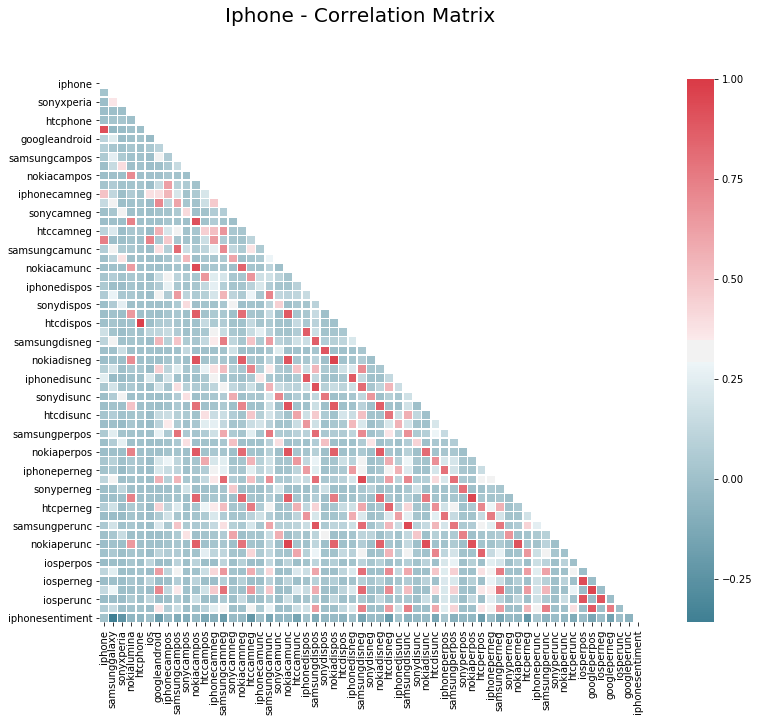

In [110]:
#detecting collinearity of features

fig, ax = plt.subplots(1, 1, figsize = (16,10))

fig.suptitle('Iphone - Correlation Matrix',fontsize=20)

mask = np.zeros_like(Iphone.corr(), dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(Iphone.corr(),cmap=cmap,mask=mask,
            square=True, linewidths=.5)

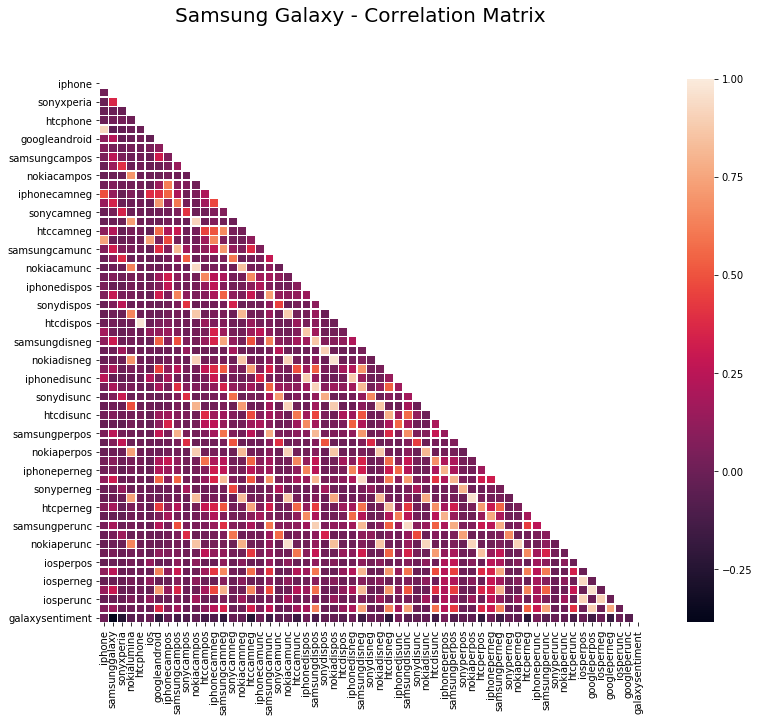

In [111]:
#detecting collinearity of features

fig, ax = plt.subplots(1, 1, figsize = (16,10))

fig.suptitle('Samsung Galaxy - Correlation Matrix',fontsize=20)

mask = np.zeros_like(SamsungGalaxy.corr(), dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(SamsungGalaxy.corr(),mask=mask,
            square=True, linewidths=.5)

### Feature Selection

In [412]:
print('Iphone Shape:', Iphone.shape)
print('Samsung Shape:',SamsungGalaxy.shape,'\n')

Iphone_variance = Iphone.var().sort_values()

Samsung_variance = SamsungGalaxy.var().sort_values()

print(Iphone_variance)

Iphone Shape: (12973, 59)
Samsung Shape: (12973, 59) 

nokialumina         0.002616
sonycamunc          0.005848
sonycamneg          0.007241
sonyperunc          0.007549
nokiacamunc         0.016407
sonydisunc          0.022104
sonycampos          0.026651
sonyxperia          0.029332
nokiaperunc         0.033580
nokiacamneg         0.037581
samsungcamunc       0.040121
sonyperpos          0.041399
nokiadisunc         0.045921
nokiacampos         0.051834
googleandroid       0.065035
nokiadisneg         0.076178
samsunggalaxy       0.078888
googleperunc        0.081686
sonyperneg          0.093160
nokiaperneg         0.093867
iosperunc           0.098428
nokiaperpos         0.105191
sonydispos          0.113962
nokiadispos         0.137043
samsungperunc       0.159162
googleperpos        0.181987
htccamunc           0.233751
samsungdisunc       0.238240
samsungcamneg       0.281155
iosperpos           0.303310
iosperneg           0.319610
googleperneg        0.343437
htcdisunc        

In [735]:
Iphone_novariance = Iphone_variance[Iphone_variance < 1]
Samsung_novariance = Samsung_variance[Samsung_variance <  1]

In [736]:
Iphone_col_list = Iphone_novariance.index.values.tolist() 
Samsung_col_list = Samsung_novariance.index.values.tolist()

In [737]:
Iphone.drop(columns = Iphone_col_list, inplace=True)
SamsungGalaxy.drop(columns=Samsung_col_list, inplace=True)

In [738]:
print('Iphone Shape:', Iphone.shape)
print('Samsung Shape:',SamsungGalaxy.shape)

Iphone Shape: (12973, 14)
Samsung Shape: (12973, 14)


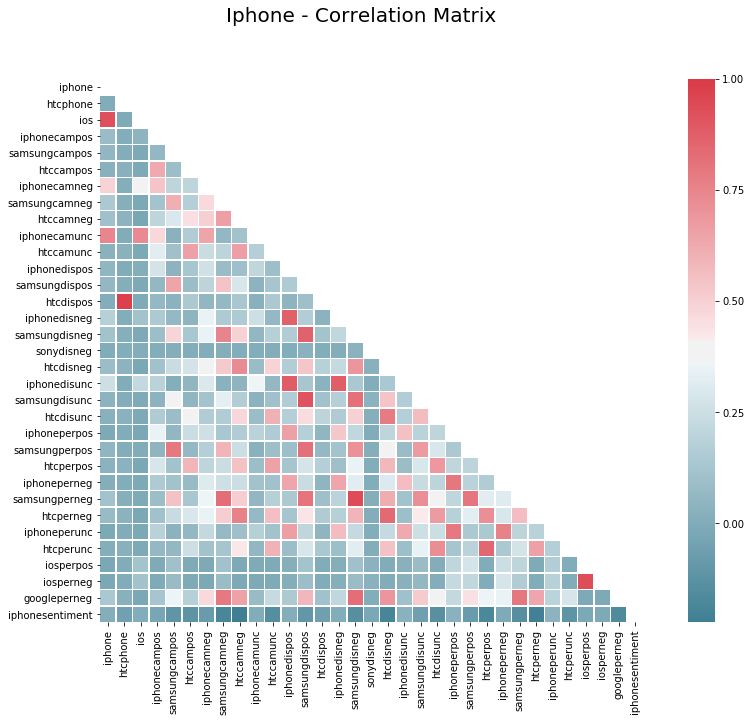

In [384]:
#detecting collinearity of features

fig, ax = plt.subplots(1, 1, figsize = (16,10))

fig.suptitle('Iphone - Correlation Matrix',fontsize=20)

mask = np.zeros_like(Iphone.corr(), dtype=np.bool)

mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(Iphone.corr(),cmap=cmap,mask=mask,
            square=True, linewidths=.5)

In [417]:
Iphone.corr()[Iphone.corr()>0.9]

,iphone,htcphone,iphonecampos,htccampos,iphonecamunc,iphonedispos,htcdispos,iphonedisneg,iphonedisunc,iphoneperpos,htcperpos,iphoneperneg,iphoneperunc,iphonesentiment
iphone,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
htcphone,NaN,1.000000,NaN,NaN,NaN,NaN,0.977538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iphonecampos,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
htccampos,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iphonecamunc,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iphonedispos,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
htcdispos,NaN,0.977538,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iphonedisneg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
iphonedisunc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
iphoneperpos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


### Modeling Process

In [626]:
# Classification

from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

In [756]:
# split Data in training and test sets for IPhone

from sklearn.model_selection import train_test_split

#separate dependent(target) variable and independent variables

target = Iphone.loc[:, Iphone.columns == 'iphonesentiment']

df = Iphone.drop(['iphonesentiment'],axis=1)

#split Data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=42)

In [757]:
# split Data in training and test sets for Samsung Galaxy

from sklearn.model_selection import train_test_split

#separate dependent(target) variable and independent variables

target2 = SamsungGalaxy.loc[:, SamsungGalaxy.columns == 'galaxysentiment']

df2 = SamsungGalaxy.drop(['galaxysentiment'],axis=1)

#split Data
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2, target2, test_size=0.25, random_state=42)

### SVC (Support Vector Classifier)

In [445]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.1, 1, 5, 6, 7, 8]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [447]:
import warnings
warnings.filterwarnings('ignore')

svc_param_selection(X_train,y_train, 5)

{'C': 5, 'gamma': 0.1}

In [803]:
# optimal parameter combination for SVM model 
model = SVC(C=5, gamma=0.1, kernel='rbf')

In [804]:
model.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [805]:
predictions = model.predict(X_test)

In [806]:
print(confusion_matrix(y_test,predictions))

[[ 268    2  296]
 [   2  214  204]
 [   5    8 2245]]


In [807]:
#target_names = ['VERY NEGATIVE', 'NEGATIVE', 'SOMEWHAT NEGATIVE','SOMEWHAT POSITIVE','POSITIVE','VERY POSITIVE']
#target_names=target_names)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.97      0.47      0.64       566
           3       0.96      0.51      0.66       420
           6       0.82      0.99      0.90      2258

   micro avg       0.84      0.84      0.84      3244
   macro avg       0.92      0.66      0.73      3244
weighted avg       0.86      0.84      0.82      3244



In [808]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.8406288532675709
Kappa:     0.5884901251252578


### KNN

In [514]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()

def knn_param_selection(X, y, nfolds):
    K = [1,2,3,4,5,6,7,8,9,10]
    
    param_grid = {'n_neighbors': K}
    grid_search = GridSearchCV(knn, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [515]:
knn_param_selection(X_train,y_train, 5)

{'n_neighbors': 9}

In [809]:
#optimal model
model = neighbors.KNeighborsClassifier(n_neighbors = 9)

In [810]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [811]:
predictions = model.predict(X_test)

In [812]:
print(confusion_matrix(y_test,predictions))

[[ 283    2  281]
 [   4  210  206]
 [  12   20 2226]]


In [813]:
#target_names = ['VERY NEGATIVE', 'NEGATIVE', 'SOMEWHAT NEGATIVE','SOMEWHAT POSITIVE','POSITIVE','VERY POSITIVE']
#,target_names=target_names
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.50      0.65       566
           3       0.91      0.50      0.64       420
           6       0.82      0.99      0.90      2258

   micro avg       0.84      0.84      0.84      3244
   macro avg       0.89      0.66      0.73      3244
weighted avg       0.85      0.84      0.82      3244



In [814]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.8381627620221949
Kappa:     0.587717760840958


### Random Forest Classifier

In [659]:
from sklearn.ensemble import RandomForestClassifier

In [476]:
RF = RandomForestClassifier()

def RF_param_selection(X, y, nfolds):
    trees = [700,800,900,950]
    maxfeatures = [2,3,4]
    
    param_grid = {'n_estimators': trees, 'max_features': maxfeatures}
    grid_search = GridSearchCV(RF, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [477]:
RF_param_selection(X_train,y_train, 5)

{'max_features': 4, 'n_estimators': 700}

In [815]:
#optimal model
model = RandomForestClassifier(n_estimators=700, max_features=4)

In [816]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [817]:
predictions = model.predict(X_test)

In [818]:
print(confusion_matrix(y_test,predictions))

[[ 287    3  276]
 [   3  220  197]
 [  12   15 2231]]


In [819]:
target_names = ['VERY NEGATIVE', 'NEGATIVE', 'SOMEWHAT NEGATIVE','SOMEWHAT POSITIVE','POSITIVE','VERY POSITIVE']
#,target_names=target_names)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.51      0.66       566
           3       0.92      0.52      0.67       420
           6       0.83      0.99      0.90      2258

   micro avg       0.84      0.84      0.84      3244
   macro avg       0.90      0.67      0.74      3244
weighted avg       0.86      0.84      0.83      3244



In [820]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.844019728729963
Kappa:     0.604181516716132


### Neural Network

In [274]:
from sklearn.neural_network import MLPClassifier

In [797]:
model = MLPClassifier(hidden_layer_sizes=(50,))

In [821]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [822]:
predictions = model.predict(X_test)

In [823]:
print(confusion_matrix(y_test,predictions))

[[ 288    1  277]
 [   3  220  197]
 [  12   15 2231]]


In [824]:
target_names = ['VERY NEGATIVE', 'NEGATIVE', 'SOMEWHAT NEGATIVE','SOMEWHAT POSITIVE','POSITIVE','VERY POSITIVE']
#,target_names=target_names
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.51      0.66       566
           3       0.93      0.52      0.67       420
           6       0.82      0.99      0.90      2258

   micro avg       0.84      0.84      0.84      3244
   macro avg       0.90      0.67      0.74      3244
weighted avg       0.86      0.84      0.83      3244



In [825]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.844327990135635
Kappa:     0.6047746842723378


In [715]:
#model training for Samsung Galaxy

model2 = MLPClassifier()

model2.fit(X_train2, y_train2)

predictions2 = model2.predict(X_test2)

print(confusion_matrix(y_test2,predictions2))

[[ 285    0    0    1    1  118]
 [   0    0    1    0    1   90]
 [   0    0   13    0    1  104]
 [   2    0    0  204    0   99]
 [   3    0    0    1  123  262]
 [   4    0    0    7    8 1916]]


In [716]:
target_names = ['VERY NEGATIVE', 'NEGATIVE', 'SOMEWHAT NEGATIVE','SOMEWHAT POSITIVE','POSITIVE','VERY POSITIVE']

print(classification_report(y_test,predictions))
print('Accuracy: ',accuracy_score(y_test2,predictions2))
print('Kappa:    ', cohen_kappa_score(predictions2,y_test2))

              precision    recall  f1-score   support

           0       0.97      0.61      0.75       466
           1       0.00      0.00      0.00       100
           2       0.63      0.10      0.17       121
           3       0.95      0.69      0.80       299
           4       0.92      0.31      0.47       381
           5       0.72      0.99      0.83      1877

   micro avg       0.76      0.76      0.76      3244
   macro avg       0.70      0.45      0.50      3244
weighted avg       0.77      0.76      0.72      3244

Accuracy:  0.783292231812577
Kappa:     0.5677542566273592


### Logistic Regression

In [568]:
from sklearn.linear_model import LogisticRegression

In [826]:
model = LogisticRegression()

In [827]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [828]:
predictions = model.predict(X_test)

In [829]:
print(confusion_matrix(y_test,predictions))

[[ 252    7  307]
 [  17   96  307]
 [  26    3 2229]]


In [830]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.45      0.59       566
           3       0.91      0.23      0.37       420
           6       0.78      0.99      0.87      2258

   micro avg       0.79      0.79      0.79      3244
   macro avg       0.85      0.55      0.61      3244
weighted avg       0.81      0.79      0.76      3244



In [832]:
print('Accuracy: ',accuracy_score(y_test,predictions))
print('Kappa:    ', cohen_kappa_score(predictions,y_test))

Accuracy:  0.7943896424167695
Kappa:     0.4441312537379076


### Using Regression instead of Classification for modeling process

#### Random Forest Regressor

In [726]:
from sklearn.ensemble import RandomForestRegressor

In [728]:
model = RandomForestRegressor()

def RF_param_selection(X, y, nfolds):
    trees = [100,200,250,300,400,500]
    
    param_grid = {'n_estimators': trees}
    grid_search = GridSearchCV(RF, param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [729]:
RF_param_selection(X_train,y_train, 5)

{'n_estimators': 500}

In [762]:
#optimal model
model = RandomForestRegressor(n_estimators = 500)

In [763]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [764]:
prediction = model.predict(X_test)

In [765]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("mean absolute error: ", mean_absolute_error(y_test,prediction))
print("mean squared error: ", mean_squared_error(y_test,prediction))
print("r2_score", r2_score(y_test, prediction))

mean absolute error:  1.159195439938722
mean squared error:  3.2500735736446127
r2_score 0.39661226490082424


### Making predictions for the Large Data Set

In [723]:
#optimal model for predictions with accuracy of 84% and Kappa of 60%

model = MLPClassifier()
model.fit(X_train, y_train)

model2 = MLPClassifier()
model2.fit(X_train2, y_train2)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [675]:
#predicting sentiment towards Iphone for 3 classes (0=negative,3=neutral,6=positive)

iphonesen_3classes = model.predict(LargeMatrix)

In [684]:
#predicting sentiment towards Iphone for 3 classes (0=negative,3=neutral,6=positive)

galaxysen_3classes = model2.predict(LargeMatrix)

In [724]:
#predicting sentiment towards Iphone for 6 classes 

iphonesentiment = model.predict(LargeMatrix)

In [725]:
#predicting sentiment towards Iphone for 3 classes (0=negative,3=neutral,6=positive)

galaxysentiment = model2.predict(LargeMatrix)

In [766]:
#including predictions into Data Frame

LargeMatrix['iphonesen_3classes'] = iphonesen_3classes

LargeMatrix['galaxysen_3classes'] = galaxysen_3classes

LargeMatrix['iphonesentiment'] = iphonesentiment

LargeMatrix['galaxysentiment'] = galaxysentiment

In [767]:
LargeMatrix.shape

(36712, 62)

In [769]:
LargeMatrix.head()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesen_3classes,galaxysen_3classes,iphonesentiment,galaxysentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


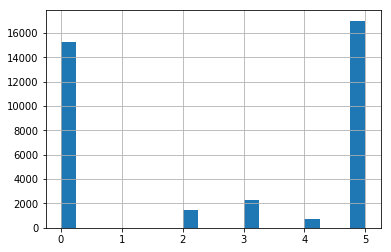

In [770]:
LargeMatrix['iphonesentiment'].hist(bins=20)

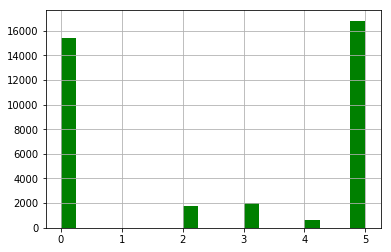

In [775]:
LargeMatrix['galaxysentiment'].hist(color='green',bins=20)

In [776]:
#counting all levels of sentiment towards Iphone in Training Set

print(LargeMatrix['iphonesentiment'].value_counts(sort=True))
print(LargeMatrix['iphonesen_3classes'].value_counts(sort=True))

5    17015
0    15307
3     2247
2     1422
4      721
Name: iphonesentiment, dtype: int64
6    17295
0    15354
3     4063
Name: iphonesen_3classes, dtype: int64


In [777]:
#counting all levels of sentiment towards Iphone in Training Set

print(LargeMatrix['galaxysentiment'].value_counts(sort=True))
print(LargeMatrix['galaxysen_3classes'].value_counts(sort=True))

5    16797
0    15433
3     2029
2     1786
4      666
1        1
Name: galaxysentiment, dtype: int64
6    17683
0    15424
3     3605
Name: galaxysen_3classes, dtype: int64


In [790]:
#average rating for Phone types 

p1 = LargeMatrix['iphonesentiment'].mean()
p2 = LargeMatrix['galaxysentiment'].mean()

p3 = LargeMatrix['iphonesen_3classes'].mean()
p4 = LargeMatrix['galaxysen_3classes'].mean()

print('Average sentiment towards Iphone and Samsung Galaxy for August 2019 \n\nIphone: {one} \nGalaxy: {two}'.format(one=p1,two=p2))

print('\nClassification with 3 classes: \n')
print('Iphone: {one} \nGalaxy: {two}'.format(one=p3,two=p4))

Average sentiment towards Iphone and Samsung Galaxy for August 2019 

Iphone: 2.657005883634779 
Galaxy: 2.6233656570058836

Classification with 3 classes: 

Iphone: 3.1586129875789934 
Galaxy: 3.1845990411854435
